# Greenhouse Gas Emissions in Finland - Overview

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from pathlib import Path
from src import settings
%matplotlib inline
plt.style.use('seaborn')

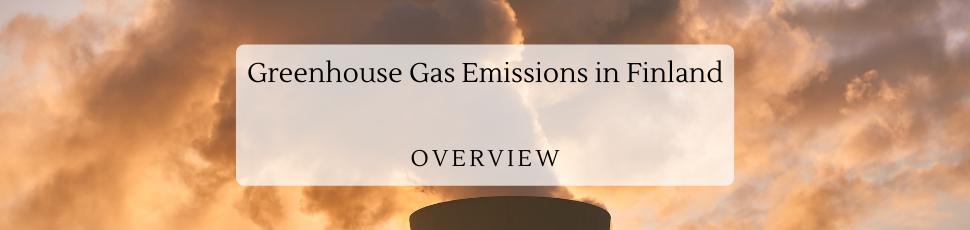

In [2]:
Image(filename=settings.REFERENCES_PATHS['IMG'] / 'GGEF.png', width=1000)

## 1. Import and clean the data

In [3]:
# Import data
df = pd.read_csv(settings.DATA_PATHS['PROCESSED'] / 'statfin_khki_pxt_111k_2021-02-07.csv', index_col=0)
df.head(), df.dtypes

(   Year      Emission category             Greenhouse gas  \
 0  1990  1A1 Energy industries       Carbon dioxide (CO2)   
 1  1990  1A1 Energy industries              Methane (CH4)   
 2  1990  1A1 Energy industries        Nitrous oxide (N2O)   
 3  1990  1A1 Energy industries  Hydrofluorocarbons (HFCs)   
 4  1990  1A1 Energy industries    Perfluorocarbons (PFCs)   
 
                             Information    value  
 0  Emission, thousand tonnes of CO2 eq.  18843.0  
 1  Emission, thousand tonnes of CO2 eq.     10.0  
 2  Emission, thousand tonnes of CO2 eq.    116.0  
 3  Emission, thousand tonnes of CO2 eq.      NaN  
 4  Emission, thousand tonnes of CO2 eq.      NaN  ,
 Year                  object
 Emission category     object
 Greenhouse gas        object
 Information           object
 value                float64
 dtype: object)

In [4]:
# Remove "Information" column because there is no observations
df.drop('Information', inplace=True, axis=1)

# Rename columns for clarity
df.rename(columns={'Emission category': 'Emission_category', 'Greenhouse gas':'Greenhouse_gas', 'value': 'Emission_thousand_tonnes_of_CO2_eq.'}, inplace=True)

# Fix illegal charactares from Year column values
df.Year = df.Year.str.replace('*', '', regex=False)

# Edit Year column dtype to numeric
df.Year = pd.to_numeric(df.Year)

# Check the format
df.head(), df.dtypes

(   Year      Emission_category             Greenhouse_gas  \
 0  1990  1A1 Energy industries       Carbon dioxide (CO2)   
 1  1990  1A1 Energy industries              Methane (CH4)   
 2  1990  1A1 Energy industries        Nitrous oxide (N2O)   
 3  1990  1A1 Energy industries  Hydrofluorocarbons (HFCs)   
 4  1990  1A1 Energy industries    Perfluorocarbons (PFCs)   
 
    Emission_thousand_tonnes_of_CO2_eq.  
 0                              18843.0  
 1                                 10.0  
 2                                116.0  
 3                                  NaN  
 4                                  NaN  ,
 Year                                     int64
 Emission_category                       object
 Greenhouse_gas                          object
 Emission_thousand_tonnes_of_CO2_eq.    float64
 dtype: object)

## 2. Explore the data

### 2.1 Total Greenhouse Gas Emissions in Finland 1990 - 2020

#### 2.1.1 Group total emissions by year

In [5]:
grouped_year = df.groupby(['Year'])['Emission_thousand_tonnes_of_CO2_eq.'].sum().reset_index().set_index('Year')
grouped_year

,Emission_thousand_tonnes_of_CO2_eq.
Year,
1990,57515.0
1991,42546.0
1992,46988.0
1993,49210.0
1994,61491.0
1995,58371.0
1996,57249.0
1997,60638.0
1998,58157.0


#### 2.1.2 Highest level of emissions

In [6]:
grouped_year[grouped_year['Emission_thousand_tonnes_of_CO2_eq.'] == grouped_year['Emission_thousand_tonnes_of_CO2_eq.'].max()]

,Emission_thousand_tonnes_of_CO2_eq.
Year,
2003,66719.0


#### 2.1.3 Lowest level of emissions

In [7]:
grouped_year[grouped_year['Emission_thousand_tonnes_of_CO2_eq.'] == grouped_year['Emission_thousand_tonnes_of_CO2_eq.'].min()]

,Emission_thousand_tonnes_of_CO2_eq.
Year,
2009,35277.0


#### 2.1.4 Line chart

Text(0.5, 1.0, 'Emission, thousand tonnes of CO2 eq. in Finland')

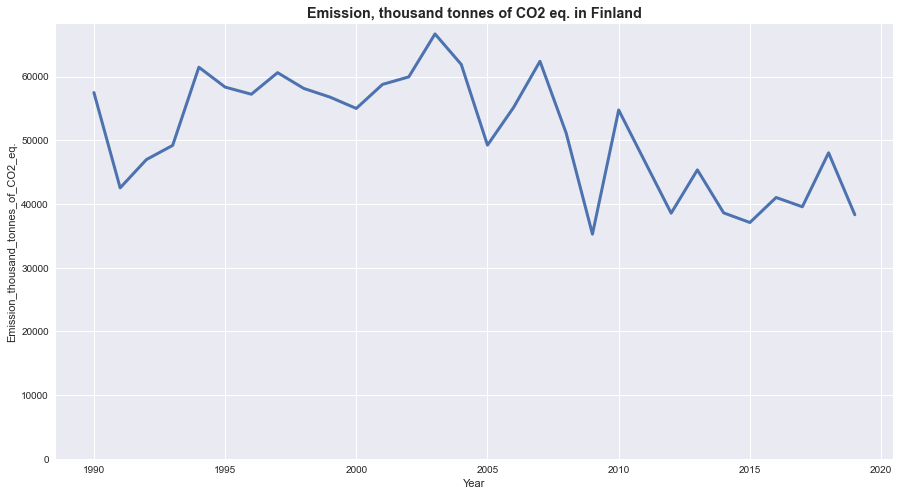

In [8]:
# Draw lineplot of total gas emissions 1990 - 2020
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df, x='Year', y='Emission_thousand_tonnes_of_CO2_eq.', estimator=sum, ci=None, linewidth=3)
ax.set_ylim(ymin=0)
plt.title('Emission, thousand tonnes of CO2 eq. in Finland', fontsize='x-large', weight='bold')

#### 2.1.5 Findings
From the graph we can see that during 90s there were an increasing trend of emissions in Finland. But at the beginning of 21st century, trend turns and emissions start to decline reaching the lowest level in 2009. Which was probably due to global banking crisis during that time. In addition, there was a depression in Finland in early 1990s which explains the strong decline at that time.

- **Highest level of emissions:** Year 2003, Emission, thousand tonnes of CO2 eq. = 66719
- **Lowest level of emission:** Year 2009, Emission, thousand tonnes of CO2 eq. = 35277

In 2009, emissions declined by almost half compared to the peak year 2003.

### 2.2 Greenhouse Gas Emissions in Finland by Emission Category (2010s)

#### 2.2.1 Pivot table

In [9]:
# Create pivot table with margins. Index by emission category.
df_2010s = df[df.Year > 2009]
df_pivot_year = df_2010s.pivot_table(index=['Emission_category'], columns='Year', values='Emission_thousand_tonnes_of_CO2_eq.', aggfunc='sum', margins=True, \
                          margins_name='Total').nlargest(11, columns='Total')
df_pivot_year

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Emission_category,,,,,,,,,,,
Total,54772.0,46659.0,38572.0,45371.0,38620.0,37105.0,41034.0,39579.0,48054.0,38324.0,428090.0
1A1 Energy industries,30948.0,24942.0,20895.0,22169.0,20950.0,17763.0,19151.0,17527.0,18672.0,16268.0,209285.0
1A3 Transport,12707.0,12513.0,12205.0,11978.0,10856.0,10857.0,12073.0,11462.0,11663.0,11264.0,117578.0
1A2 Manufacturing industries and construction,10042.0,9641.0,8425.0,8400.0,7076.0,6757.0,6827.0,6671.0,6817.0,6588.0,77244.0
4B Cropland,7632.0,7537.0,7751.0,7454.0,7394.0,7341.0,7836.0,7645.0,7845.0,7942.0,76377.0
1A4 Other sectors,5193.0,4518.0,4813.0,4416.0,4301.0,4069.0,4185.0,4044.0,3865.0,3774.0,43178.0
3D Agricultural soils,3529.0,3471.0,3450.0,3431.0,3513.0,3521.0,3527.0,3517.0,3467.0,3616.0,35042.0
4D Wetlands,2325.0,2261.0,2122.0,2331.0,2205.0,2149.0,2155.0,2165.0,2313.0,2227.0,22253.0
2C Metal industry,2439.0,2377.0,2285.0,2095.0,2052.0,2142.0,2171.0,1904.0,2082.0,1856.0,21403.0


#### 2.2.2 Line chart (Top 10 Emission categories)

In [10]:
# Create dataframe with top 10 emission categories
top_categories = df_pivot_year.index.tolist()[1:]    # Exclude "Total" from index names

df_top_categories = df[df.Emission_category.isin(top_categories)].sort_values('Emission_thousand_tonnes_of_CO2_eq.', ascending=False)

Text(0.5, 1.0, 'Emission thousand tonnes of CO2 eq. in Finland by Top 10 Emission Categories')

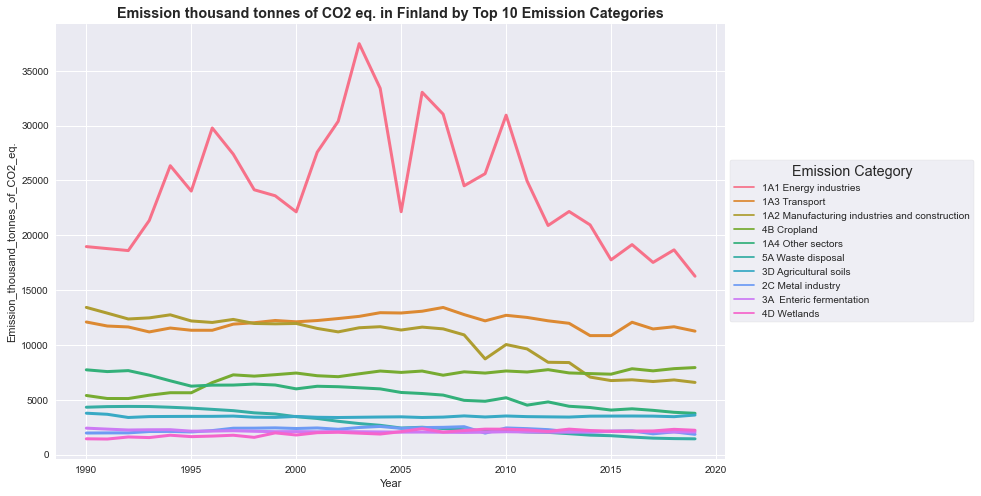

In [11]:
# Draw lineplot by emission category
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_top_categories, x='Year', y='Emission_thousand_tonnes_of_CO2_eq.', hue='Emission_category', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Emission Category", title_fontsize='x-large')
plt.title('Emission thousand tonnes of CO2 eq. in Finland by Top 10 Emission Categories', fontsize='x-large', weight='bold')

#### Findings
*Energy industries* produces significantly more emissions than any other category. We can find corresponding trend in this category as we saw when exploring total emissions. First, there was increasing trend which turns to decline at the beginning of the 21st century.

Regarding other categories, there has been declining trend in categories *Manufacturing industries and construction* and *Other sectors*. Unlike other categories, *Cropland* has notable increasing trend.

- **The most significant emission category in Finland:** *Energy industries*

### 2.3 Greenhouse Gas Emissions in Finland by Greenhouse Gas

#### 2.3.1 Pivot table (2010s only)

In [12]:
# Create pivot table with margins. Index by greenhouse gas.
df_2010s = df[df.Year > 2009]
df_pivot_year = df_2010s.pivot_table(index=['Greenhouse_gas'], columns='Year', values='Emission_thousand_tonnes_of_CO2_eq.', aggfunc='sum', margins=True, \
                          margins_name='Total').nlargest(11, columns='Total')
df_pivot_year

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Greenhouse_gas,,,,,,,,,,,
Total,54772.0,46659.0,38572.0,45371.0,38620.0,37105.0,41034.0,39579.0,48054.0,38324.0,428090.0
Carbon dioxide (CO2),40172.0,32433.0,24436.0,31391.0,24738.0,23326.0,27483.0,26215.0,34836.0,25051.0,290081.0
Nitrous oxide (N2O),6890.0,6749.0,6716.0,6719.0,6759.0,6775.0,6753.0,6754.0,6715.0,6844.0,67674.0
Methane (CH4),6322.0,6095.0,6012.0,5845.0,5719.0,5655.0,5495.0,5375.0,5307.0,5276.0,57101.0
Hydrofluorocarbons (HFCs),1363.0,1356.0,1382.0,1380.0,1365.0,1325.0,1272.0,1209.0,1174.0,1133.0,12959.0
Sulfur hexafluoride (SF6),22.0,23.0,22.0,31.0,34.0,22.0,29.0,24.0,20.0,18.0,245.0
Perfluorocarbons (PFCs),3.0,3.0,4.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,30.0


#### 2.3.2 Line chart

Text(0.5, 1.0, 'Emission thousand tonnes of CO2 eq. in Finland by Top 10 Greenhouse Gas')

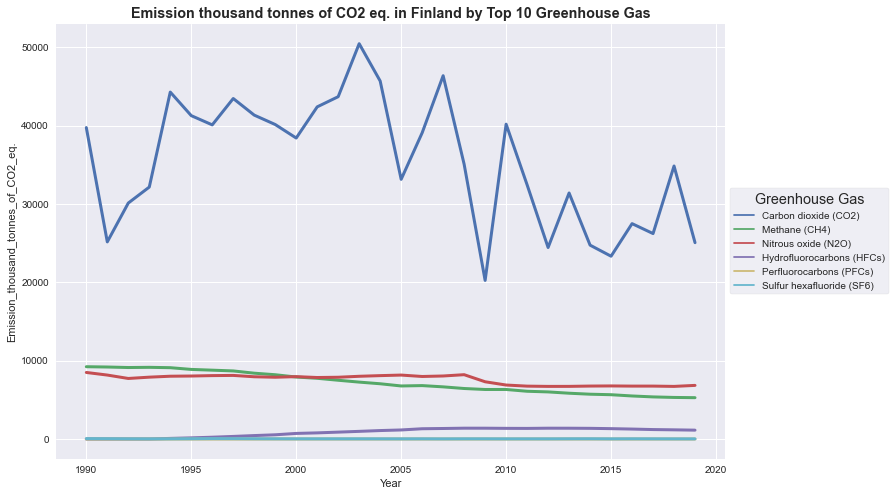

In [13]:
# Draw lineplot by greenhouse gas
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Year', y='Emission_thousand_tonnes_of_CO2_eq.', hue='Greenhouse_gas', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Greenhouse Gas", title_fontsize='x-large')
plt.title('Emission thousand tonnes of CO2 eq. in Finland by Top 10 Greenhouse Gas', fontsize='x-large', weight='bold')

#### 2.4.3 Findings
From the graph we can see that *Carbon dioxide* clearly stands out from the rest. And we can find corresponding trend as we already saw when exploring total emissions and *Energy industries* emission category.

- **The most significant greenhouse gas in Finland:** *Carbon dioxide*

### 2.4 Greenhouse Gas Emissions in Finland - Trend Analysis (2010s)

In [14]:
# Create pivot table containing columns for Absolute change and Pct change in Gas Emissions by category
df_growth = df_2010s.pivot_table(index=['Emission_category'], columns=['Year'], values='Emission_thousand_tonnes_of_CO2_eq.', aggfunc='sum')
df_growth['Absolute_change'] = df_growth[2019] - df_growth[2010]
df_growth['Pct_change'] = round(df_growth['Absolute_change'] / df_growth[2010] * 100, 2)

#### 2.4.1 Pivot table - Fastest growing gas emission categories (absolute growth)

In [15]:
df_growth.nlargest(10, columns='Absolute_change')

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Absolute_change,Pct_change
Emission_category,,,,,,,,,,,,
4A Forest land,-31042.0,-31288.0,-34344.0,-27047.0,-28757.0,-26447.0,-24820.0,-22546.0,-15289.0,-22887.0,8155.0,-26.27
2B Chemical industry,1018.0,950.0,996.0,1123.0,983.0,1173.0,1272.0,1386.0,1323.0,1351.0,333.0,32.71
4B Cropland,7632.0,7537.0,7751.0,7454.0,7394.0,7341.0,7836.0,7645.0,7845.0,7942.0,310.0,4.06
3D Agricultural soils,3529.0,3471.0,3450.0,3431.0,3513.0,3521.0,3527.0,3517.0,3467.0,3616.0,87.0,2.47
2D Non-energy products from fuels and solvent use,115.0,113.0,117.0,127.0,115.0,139.0,146.0,141.0,159.0,155.0,40.0,34.78
3F Field burning of agricultural residues,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,200.00
3H Urea application,2.0,3.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.00
4(IV) Indirect N2O emissions,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.00
5D Wastewater treatment and discharge,250.0,253.0,255.0,248.0,247.0,248.0,246.0,243.0,243.0,243.0,-7.0,-2.80


#### 2.4.2 Pivot table - Fastest declining gas emission categories (absolute decline)

In [16]:
df_growth.nsmallest(10, columns='Absolute_change')

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Absolute_change,Pct_change
Emission_category,,,,,,,,,,,,
1A1 Energy industries,30948.0,24942.0,20895.0,22169.0,20950.0,17763.0,19151.0,17527.0,18672.0,16268.0,-14680.0,-47.43
1A2 Manufacturing industries and construction,10042.0,9641.0,8425.0,8400.0,7076.0,6757.0,6827.0,6671.0,6817.0,6588.0,-3454.0,-34.40
1A3 Transport,12707.0,12513.0,12205.0,11978.0,10856.0,10857.0,12073.0,11462.0,11663.0,11264.0,-1443.0,-11.36
1A4 Other sectors,5193.0,4518.0,4813.0,4416.0,4301.0,4069.0,4185.0,4044.0,3865.0,3774.0,-1419.0,-27.33
4G Harvested wood products,-2195.0,-2171.0,-1675.0,-2367.0,-3027.0,-2909.0,-3818.0,-4498.0,-4582.0,-3373.0,-1178.0,53.67
4E Settlements,1686.0,1748.0,1622.0,1513.0,1464.0,1213.0,985.0,880.0,794.0,675.0,-1011.0,-59.96
5A Waste disposal,2170.0,2076.0,2036.0,1916.0,1785.0,1732.0,1609.0,1510.0,1468.0,1448.0,-722.0,-33.27
2C Metal industry,2439.0,2377.0,2285.0,2095.0,2052.0,2142.0,2171.0,1904.0,2082.0,1856.0,-583.0,-23.90
2F Product uses as substitutes for ozone-depleting substances,1361.0,1355.0,1381.0,1380.0,1365.0,1324.0,1270.0,1208.0,1173.0,1133.0,-228.0,-16.75


#### 2.4.3 Findings
*Forest land* is the fastest growing emission category. It is important to notice that this category is [Carbon sink](https://en.wikipedia.org/wiki/Carbon_sink) and it doesn't produce any greenhouse gases but accumulates and stores carbon. Analysis indicates that there is declining trend how much *Forest land* stores carbon in Finland. Which leads to higher greenhouse gas emissions in total. 

Other category with growing trend is *Chemical industry* (both in terms of absolute and percentual growth).

- **Fastest absolute growth during the 2010s:** *Forest land* and *Chemical industry*
- **Fastest absolute decline during the 2010s:** *Energy industries* and *Manufacturing industries and construction*

## References
Official Statistics of Finland (OSF): Greenhouse gases  
Access method: http://pxnet2.stat.fi/PXWeb/api/v1/en/StatFin/ymp/khki/statfin_khki_pxt_111k.px